<a href="https://colab.research.google.com/github/Pedro0927/CienciaDatos-MASDI/blob/main/Seccion_1/Ejemplo_1-mall_customers_clustering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://tinyurl.com/ynykrk7j)

## Introducción

En este notebook, vamos a explorar cómo cargar un dataset utilizando la biblioteca de Python, Pandas. Pandas es una herramienta poderosa que nos permite manipular y analizar datos de manera eficiente.

Para ilustrar este proceso, utilizaremos un dataset de clustering de clientes. Este dataset contiene información sobre los clientes de un centro comercial. El centro comercial quiere segmentar a sus clientes en grupos, para poder crear campañas de marketing dirigidas a grupos específicos de clientes.

A continuación, se muestra cómo cargar este dataset en un DataFrame de Pandas.

> **Nota:** Cambiar la ruta del archivo de acuerdo a la ubicación en su computadora.

In [14]:
# verificar si estamos en google colab
try:
    import google.colab
    IN_COLAB = True
except:
    IN_COLAB = False

In [15]:
import os
# Obtener el directorio raíz del proyecto
dir_root = os.path.dirname(os.getcwd())
dir_root

'/'

In [16]:
# Importamos la biblioteca pandas
import pandas as pd

# Cargamos el dataset
data = pd.read_csv("/content/ACT_2.csv", encoding='latin-1')

# Mostramos las primeras 5 filas del dataset
data.head()

,FECHA,DEPARTAMENTO,Genero,Nivel Educativo,EDADES,TEMAS,ATENCION_MOTIVO,CANT.
0,11/10/2024,BOGOTA,Hombre,Bachiller,1 a 18,Atención en Salud,Citas Médicas,1
1,9/10/2024,BOGOTA,Hombre,Bachiller,1 a 18,Atención en Salud,Citas Médicas,1
2,9/10/2024,BOGOTA,Hombre,Bachiller,1 a 18,Atención en Salud,Citas Médicas,1
3,7/10/2024,SUCRE,Hombre,Bachiller,1 a 18,Atención en Salud,Citas Médicas,1
4,7/10/2024,BOGOTA,Hombre,Bachiller,1 a 18,Atención en Salud,Citas Médicas,1


## Exploranción del DataFrame

Una vez que el dataset se ha cargado en un DataFrame de Pandas, podemos explorar el dataset utilizando varias funciones de Pandas.


### 1. Obtener información sobre el DataFrame

De esta manera, podemos ver el número de filas y columnas que contiene el DataFrame, junto con el tipo de datos que contiene cada columna.

Lo cual nos permite responder preguntas como:

* ¿Cuántas filas y columnas hay en el DataFrame?
* ¿Qué tipo de datos contiene cada columna?
* ¿Hay valores faltantes en el DataFrame?
* ¿Qué columnas o filas contienen valores faltantes?
* ¿Qué columnas contienen valores numéricos?
* ¿Qué columnas contienen valores no numéricos?
* ¿Qué columnas pueden ser características?
* ¿Qué columna contiene la variable objetivo?


In [17]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4792 entries, 0 to 4791
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   FECHA            4792 non-null   object
 1   DEPARTAMENTO     4792 non-null   object
 2   Genero           4792 non-null   object
 3   Nivel Educativo  4792 non-null   object
 4   EDADES           4792 non-null   object
 5   TEMAS            4792 non-null   object
 6   ATENCION_MOTIVO  4792 non-null   object
 7   CANT.            4792 non-null   int64 
dtypes: int64(1), object(7)
memory usage: 299.6+ KB


### 2. Obtener estadísticas descriptivas del DataFrame

Es posible utilizar la función `describe()` para obtener estadísticas descriptivas del DataFrame.

Esto nos permite responder preguntas como:

* ¿Cuál es el valor mínimo en una columna?
* ¿Cuál es el valor máximo en una columna?
* ¿Cuál es el valor medio en una columna?
* ¿Cuál es la desviación estándar en una columna?
* ¿Cuál es el valor mínimo en una fila?
* ¿Cuál es el valor máximo en una fila?
  

In [18]:
data.describe()

,CANT.
count,4792.0
mean,1.0
std,0.0
min,1.0
25%,1.0
50%,1.0
75%,1.0
max,1.0


### 3. Verificar si hay valores faltantes

Es posible utilizar la función `isnull()` para verificar si hay valores faltantes en el DataFrame.

In [19]:
data.isnull().sum()

,0
FECHA,0
DEPARTAMENTO,0
Genero,0
Nivel Educativo,0
EDADES,0
TEMAS,0
ATENCION_MOTIVO,0
CANT.,0


### 4. Explorar la correlación entre las columnas

En un problema de clustering, es importante explorar la correlación entre las columnas. Esto nos permite responder preguntas como:

* ¿Qué columnas están altamente correlacionadas?
* ¿Qué columnas están débilmente correlacionadas?
* ¿Qué columnas no están correlacionadas?
* ¿Qué columnas son las más importantes para el problema de clustering?
* ¿Qué columnas son las menos importantes para el problema de clustering?
* ¿Qué columnas pueden ser eliminadas del DataFrame?
* ¿Qué columnas pueden ser características?
  

/usr/local/lib/python3.10/dist-packages/seaborn/matrix.py:202: RuntimeWarning: All-NaN slice encountered
  vmin = np.nanmin(calc_data)
/usr/local/lib/python3.10/dist-packages/seaborn/matrix.py:207: RuntimeWarning: All-NaN slice encountered
  vmax = np.nanmax(calc_data)


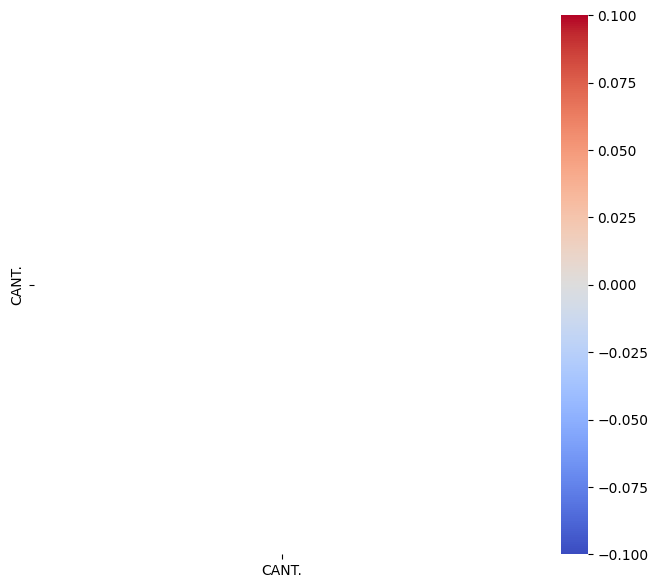

In [20]:
import seaborn as sns
import matplotlib.pyplot as plt
# Suponiendo que 'data' es tu DataFrame
correlation_matrix = data.corr(numeric_only=True)

plt.figure(figsize=(8,7))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.show()

### 5. Explorar la distribución de las columnas

Es posible utilizar la función `hist()` para explorar la distribución de las columnas numéricas.

Esto nos permite responder preguntas como:

* ¿Qué columnas tienen una distribución normal?

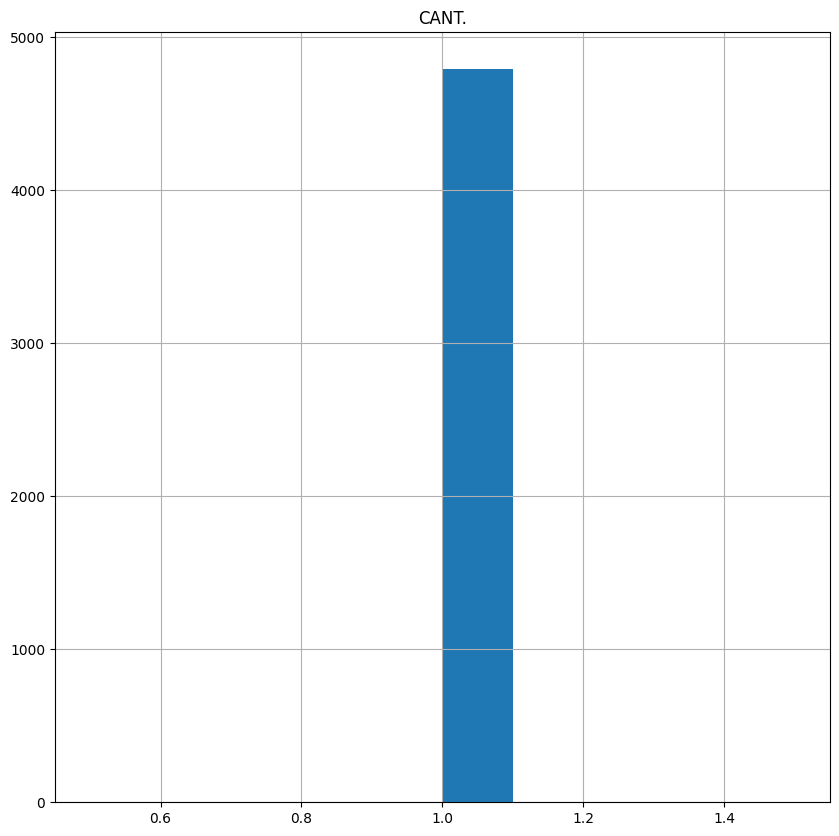

In [21]:
data.hist(figsize=(10, 10))
plt.show()

### 6. Explorar la distribución de las variables categóricas

Es posible utilizar la función `value_counts()` para explorar la distribución de las variables categóricas.

Esto nos permite responder preguntas como:

* ¿Cuántas categorías hay en una columna?
* ¿Cuántas filas pertenecen a cada categoría en una columna?


In [22]:
data["Genero"].value_counts()

,count
Genero,
Mujer,3149
Hombre,1640
No Indica,3


<ipython-input-23-e0a59af4ff54>:2: FutureWarning: pandas.value_counts is deprecated and will be removed in a future version. Use pd.Series(obj).value_counts() instead.
  count_classes = pd.value_counts(data['Genero'], sort = True)


Text(0.5, 0, 'Genero')

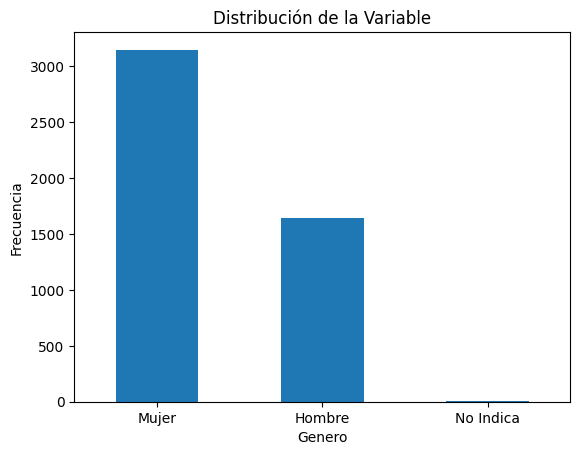

In [23]:
# Visualizar la distribución de variables categóricas
count_classes = pd.value_counts(data['Genero'], sort = True)
count_classes.plot(kind = 'bar', rot=0)
plt.title("Distribución de la Variable")
plt.ylabel("Frecuencia")
plt.xlabel("Genero")

##Analisis de edades


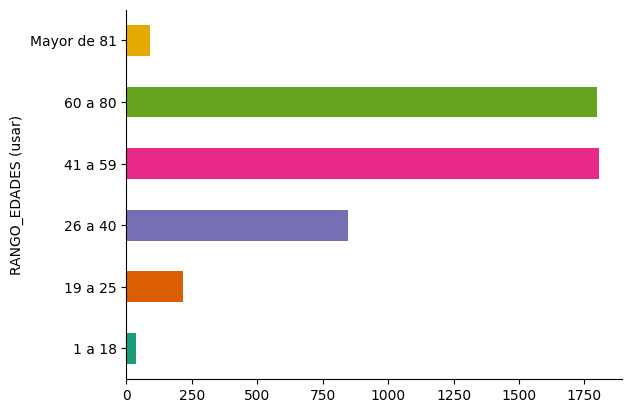

In [13]:
# @title RANGO_EDADES (usar)

from matplotlib import pyplot as plt
import seaborn as sns
data.groupby('RANGO_EDADES (usar)').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

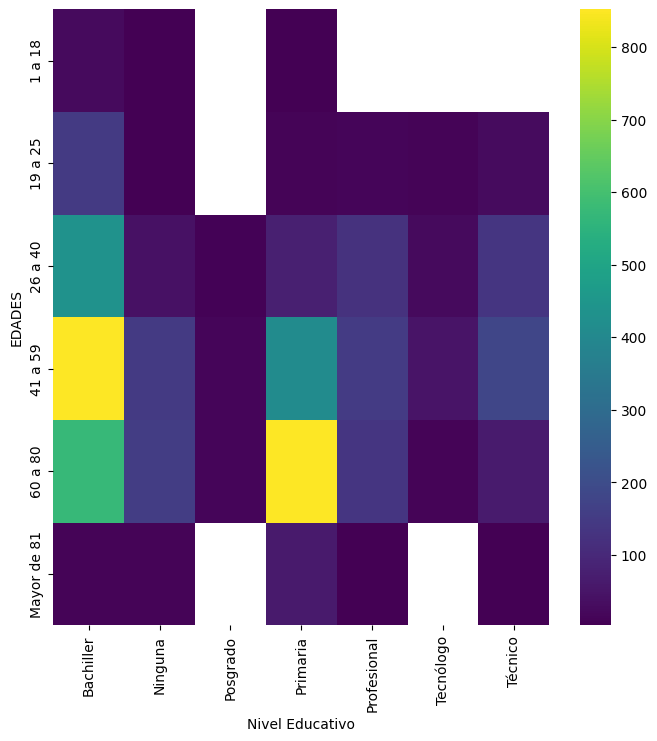

In [25]:
# @title Nivel Educativo vs EDADES

from matplotlib import pyplot as plt
import seaborn as sns
import pandas as pd
plt.subplots(figsize=(8, 8))
df_2dhist = pd.DataFrame({
    x_label: grp['EDADES'].value_counts()
    for x_label, grp in data.groupby('Nivel Educativo')
})
sns.heatmap(df_2dhist, cmap='viridis')
plt.xlabel('Nivel Educativo')
_ = plt.ylabel('EDADES')